In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('Glass Identification.csv')
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [3]:
df.shape

(213, 11)

In [4]:
df.isnull().sum()

1          0
1.52101    0
13.64      0
4.49       0
1.10       0
71.78      0
0.06       0
8.75       0
0.00       0
0.00.1     0
1.1        0
dtype: int64

In [5]:
#There is no missing data in the table

In [6]:
df.columns =['ID','Ri','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']
df

,ID,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [7]:
df.dtypes

ID        int64
Ri      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [8]:
#We have no use of the ID column. We can drop it
df.drop('ID',axis=1,inplace=True)
df

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [9]:
df.describe()

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [10]:
df.shape

(213, 10)

In [11]:
df.Type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [12]:
df.Type.value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

<Axes: xlabel='Type', ylabel='count'>

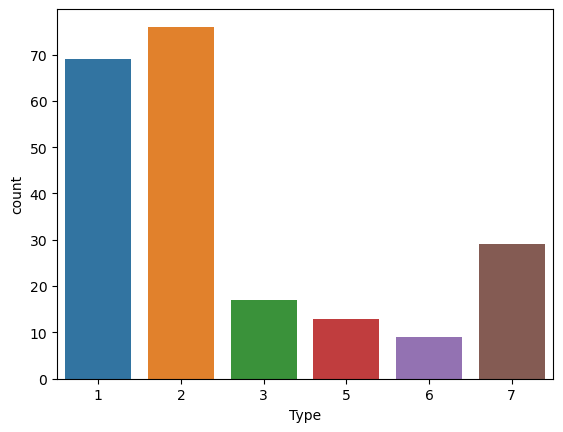

In [13]:
sns.countplot(x='Type',data=df)

  -- 1 building_windows_float_processed
  
  -- 2 building_windows_non_float_processed
  
  -- 3 vehicle_windows_float_processed
  
  -- 4 vehicle_windows_non_float_processed (none in this database)
  
  -- 5 containers
  
  -- 6 tableware
  
  -- 7 headlamps

This clearly shows, type 1 and 2 having high count since, windows of the building are involved in high criminal cases.



Ri         Axes(0.125,0.653529;0.168478x0.226471)
Na      Axes(0.327174,0.653529;0.168478x0.226471)
Mg      Axes(0.529348,0.653529;0.168478x0.226471)
Al      Axes(0.731522,0.653529;0.168478x0.226471)
Si         Axes(0.125,0.381765;0.168478x0.226471)
K       Axes(0.327174,0.381765;0.168478x0.226471)
Ca      Axes(0.529348,0.381765;0.168478x0.226471)
Ba      Axes(0.731522,0.381765;0.168478x0.226471)
Fe             Axes(0.125,0.11;0.168478x0.226471)
Type        Axes(0.327174,0.11;0.168478x0.226471)
dtype: object

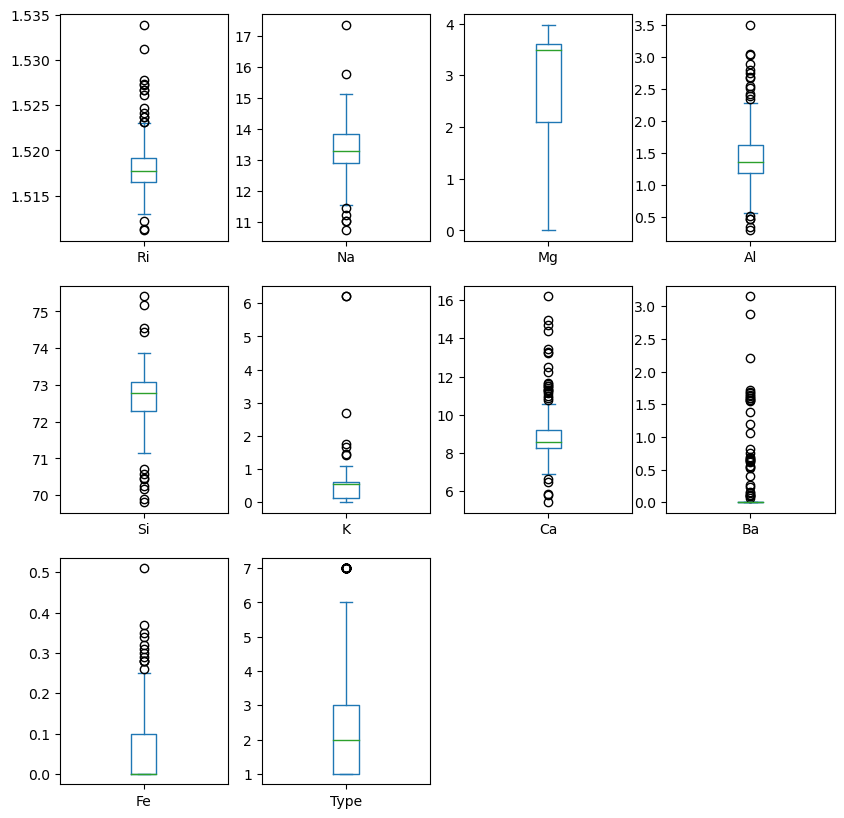

In [14]:
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(10,10))

In [15]:
# As we can see there are quiet a few outliers present. So we will remove them.

In [16]:
from scipy.stats import zscore

In [17]:
z=np.abs(zscore(df))
z

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.245101,0.591880,0.642937,0.173500,0.097091,0.029329,0.792599,0.353808,0.588301,0.851703
1,0.716826,0.150946,0.608144,0.187433,0.433777,0.167472,0.827734,0.353808,0.588301,0.851703
2,0.228607,0.240996,0.705564,0.313863,0.058303,0.108813,0.518546,0.353808,0.588301,0.851703
3,0.307777,0.167507,0.656854,0.414122,0.550322,0.078115,0.623951,0.353808,0.588301,0.851703
4,0.789399,0.755419,0.649895,0.347848,0.407878,0.216258,0.623951,0.353808,2.082200,0.851703
...,...,...,...,...,...,...,...,...,...,...
208,0.700332,0.898085,1.862164,2.874379,0.058303,0.643296,0.156046,1.778672,0.588301,2.005192
209,0.495808,1.853443,1.862164,1.089766,0.524423,0.766090,0.392060,2.844912,0.588301,2.005192
210,0.757727,1.167545,1.862164,1.149921,0.990604,0.766090,0.363952,2.945501,0.588301,2.005192
211,0.607966,1.192041,1.862164,0.989506,1.236644,0.766090,0.335844,2.804676,0.588301,2.005192


In [18]:
threshold=3
print(np.where(z>3))

(array([104, 105, 105, 105, 105, 105, 106, 106, 106, 109, 110, 111, 111,
       130, 144, 161, 162, 162, 162, 170, 170, 171, 171, 173, 183, 183,
       187, 188, 200, 200, 202, 206, 212], dtype=int64), array([6, 0, 1, 4, 6, 7, 0, 4, 6, 6, 6, 0, 6, 6, 8, 8, 3, 4, 7, 3, 5, 3,
       5, 8, 1, 4, 4, 7, 4, 5, 7, 7, 7], dtype=int64))


In [19]:
df_new=df[(z<3).all(axis=1)]
df_new

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
207,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00,7
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7


In [20]:
df=df_new

In [21]:
df

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
207,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00,7
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7


In [22]:
df.shape

(193, 10)

In [23]:
#now we will check for the skewness

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

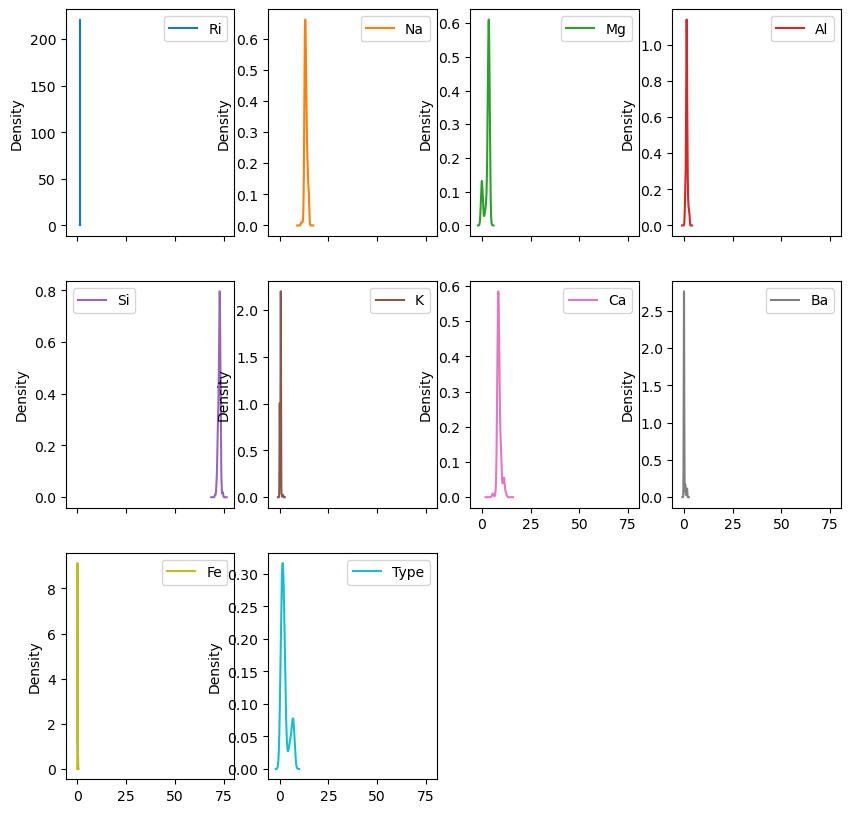

In [24]:
df.plot(kind='kde',subplots=True,layout=(3,4),figsize=(10,10))

In [25]:
df.cor=df.corr()

In [26]:
df.cor

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Ri,1.000000,0.048762,0.040224,-0.520285,-0.604910,-0.362609,0.694174,-0.191584,-0.016095,-0.162981
Na,0.048762,1.000000,-0.491934,0.254805,-0.233588,-0.612858,0.020123,0.532913,-0.209057,0.535440
Mg,0.040224,-0.491934,1.000000,-0.591948,-0.371123,0.495241,-0.456909,-0.586867,0.138597,-0.809747
Al,-0.520285,0.254805,-0.591948,1.000000,0.331868,0.000847,-0.213887,0.531651,-0.120321,0.659242
Si,-0.604910,-0.233588,-0.371123,0.331868,1.000000,0.062254,-0.167478,0.153207,0.018382,0.257640
K,-0.362609,-0.612858,0.495241,0.000847,0.062254,1.000000,-0.503380,-0.257401,0.095794,-0.391378
Ca,0.694174,0.020123,-0.456909,-0.213887,-0.167478,-0.503380,1.000000,-0.168033,-0.011883,0.154708
Ba,-0.191584,0.532913,-0.586867,0.531651,0.153207,-0.257401,-0.168033,1.000000,-0.121189,0.682676
Fe,-0.016095,-0.209057,0.138597,-0.120321,0.018382,0.095794,-0.011883,-0.121189,1.000000,-0.205058
Type,-0.162981,0.535440,-0.809747,0.659242,0.257640,-0.391378,0.154708,0.682676,-0.205058,1.000000


<Axes: >

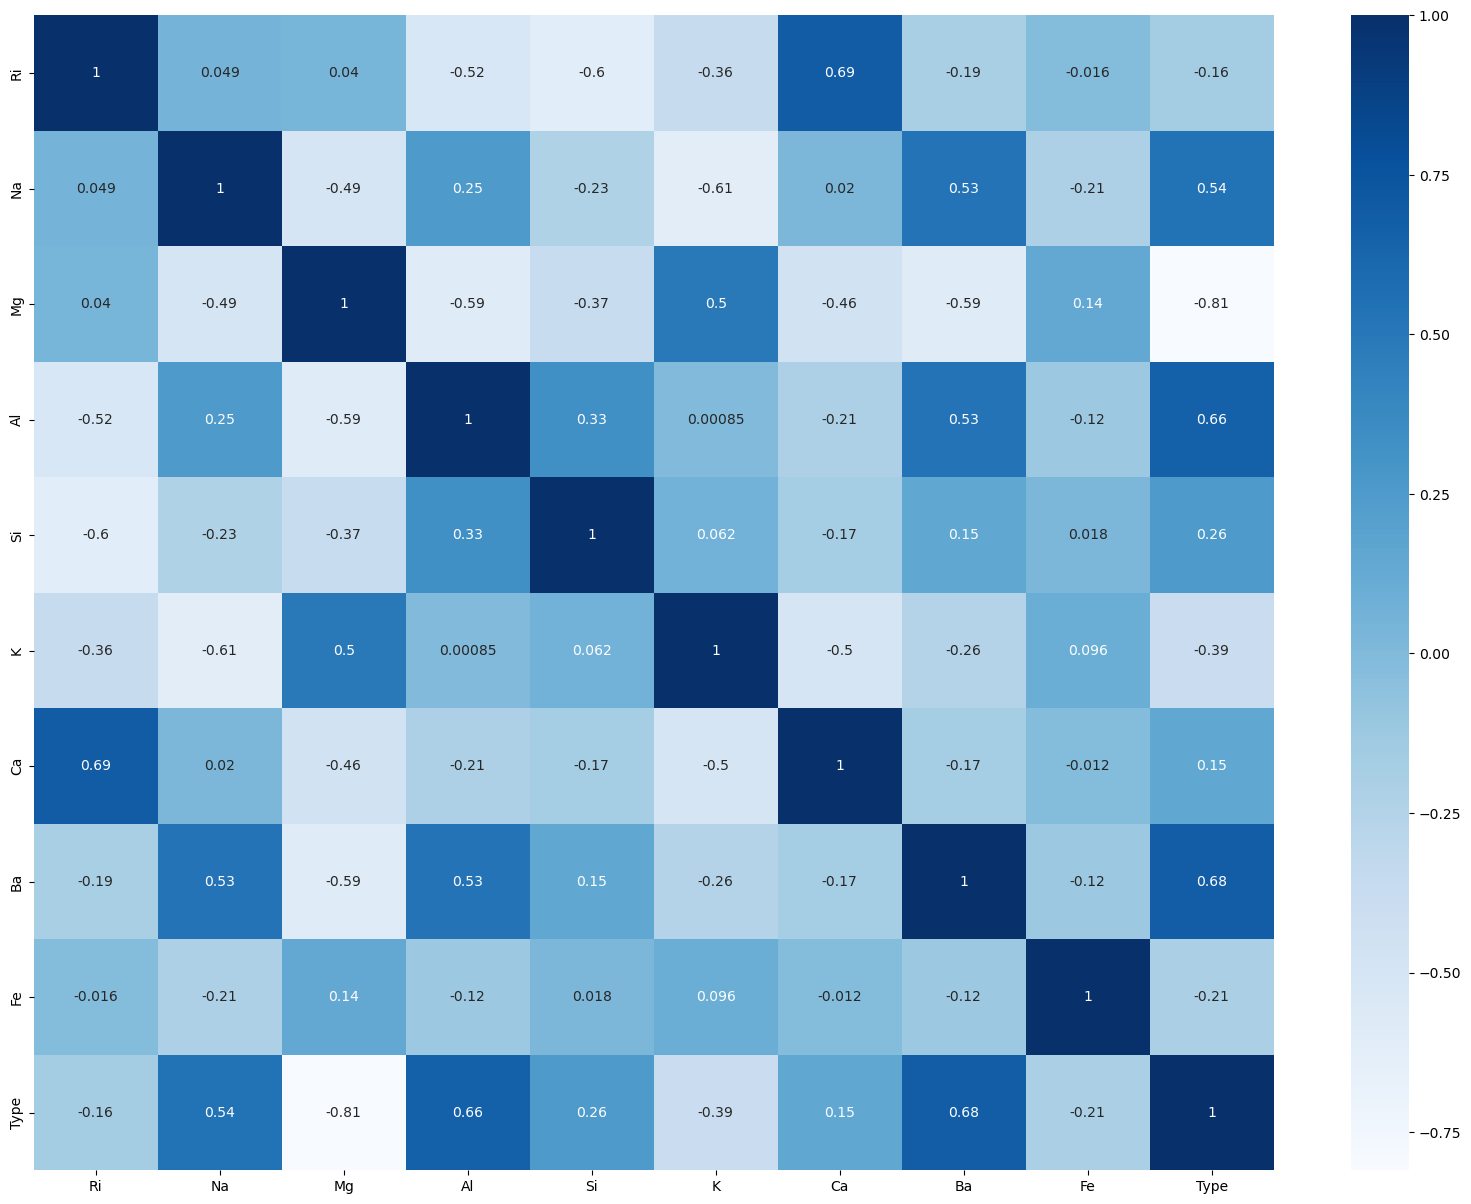

In [27]:
plt.figure(figsize=(20,15))
sns.heatmap(df.cor,cmap='Blues',annot=True)

From the correlation heatmap, we can see that

-- Calsium and refractive index has high positive correlation(0.81).

-- Sillicon and refractive index has high negative correlation(-0.54).

In [28]:
x=df.iloc[:,:-1]
x

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
...,...,...,...,...,...,...,...,...,...
207,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00


In [29]:
y=df.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
207    7
208    7
209    7
210    7
211    7
Name: Type, Length: 193, dtype: int64

In [30]:
x.shape

(193, 9)

In [31]:
y.shape

(193,)

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

# Apply different Classification Algorithms and tune them


In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [34]:
dt= DecisionTreeClassifier()
dt

DecisionTreeClassifier()

In [35]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
preddt=dt.predict(x_test)

In [37]:
accuracy_score(y_test,preddt)

0.5641025641025641

In [38]:
sv=SVC()
sv

SVC()

In [40]:
sv.fit(x_train,y_train)

SVC()

In [42]:
predsv=sv.predict(x_test)

In [43]:
accuracy_score(y_test,predsv)

0.3076923076923077

In [44]:
mnb=MultinomialNB()
mnb

MultinomialNB()

In [45]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [46]:
mnbpred=mnb.predict(x_test)

In [47]:
accuracy_score(y_test,mnbpred)

0.5128205128205128

In [51]:
Rand_f = RandomForestClassifier(max_depth = 3, min_samples_split=2, n_estimators = 50, random_state = 1)
Rand_f

RandomForestClassifier(max_depth=3, n_estimators=50, random_state=1)

In [52]:
Rand_f.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=50, random_state=1)

In [53]:
Rand_fpred=Rand_f.predict(x_test)

In [54]:
accuracy_score(y_test,Rand_fpred)

0.6410256410256411

Random Forest have higher accuracy than other

In [55]:
param_grid = { "criterion" : ["gini", "entropy"]
              , "min_samples_leaf" : [1, 5, 10]
              , "min_samples_split" : [2, 4, 10, 12, 16]
              , "n_estimators": [100, 125, 200]}
grid = GridSearchCV(estimator = Rand_f,param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)
print("Best parameters set are:")
print()
print(grid.best_params_)

Best parameters set are:

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 125}


In [57]:
model = grid.best_estimator_
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.6666666666666666


Text(610.7222222222223, 0.5, 'Predicted label')

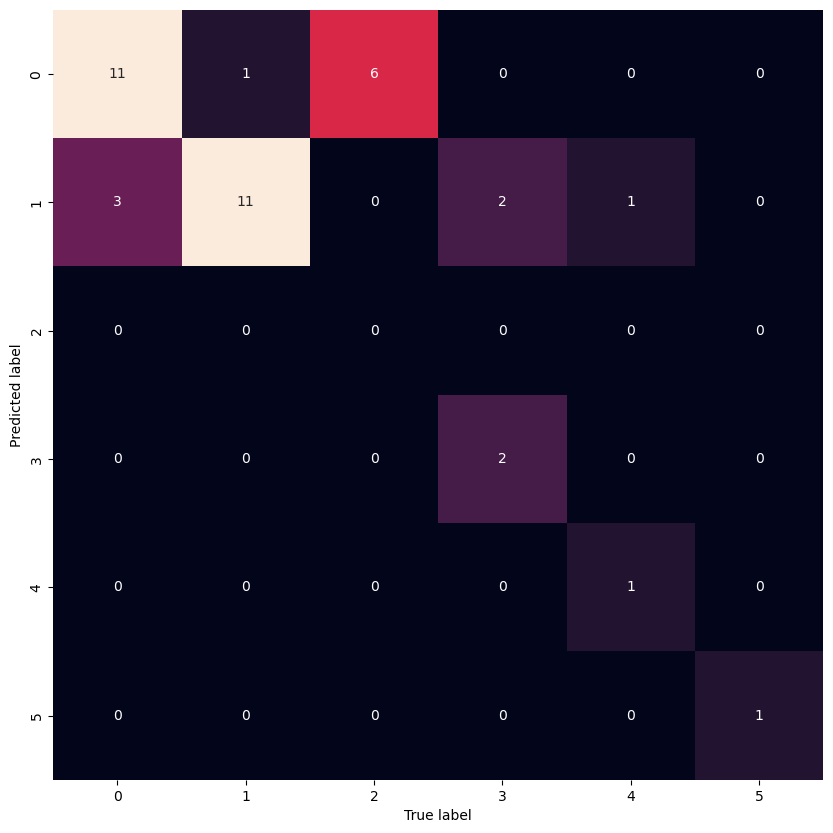

In [58]:
matrix = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(20,10))
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True label')
plt.ylabel('Predicted label')

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.61      0.79      0.69        14
           2       0.65      0.92      0.76        12
           3       0.00      0.00      0.00         6
           5       1.00      0.50      0.67         4
           6       1.00      0.50      0.67         2
           7       1.00      1.00      1.00         1

    accuracy                           0.67        39
   macro avg       0.71      0.62      0.63        39
weighted avg       0.60      0.67      0.61        39



In [64]:
forest_mod = RandomForestClassifier(min_samples_leaf= 1, min_samples_split= 4, n_estimators= 125)
forest_mod.fit(x.iloc[:,0:9],y)

RandomForestClassifier(min_samples_split=4, n_estimators=125)

In [65]:
from IPython.display import display
def find(Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe):
    y_values = forest_mod.predict([[Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe]])
    print("The Glass Type is {}".format(y_values))

In [66]:
find(1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00)

The Glass Type is [1]
